<a href="https://colab.research.google.com/github/kmkawa/podcast-book-recommender/blob/main/Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Recommendations
This notebook takes in prepped and embeded data to allow for recommendations to be made by running `get_recommendations()`.

### 1. Import Data
Cleaned and embeded descriptions are loaded

### 2. Distance Metrics
Define and create methods for distance

### 3. BERT for User Descriptions
Load BERT to turn user descriptions into embedings

### 4. Recommendations
Create user interaction with recommendation options

### 5. Experiments
Run experiments and generate graph data about parameters and metrics




### 1. Import Data

In [ ]:
import pandas as pd
import numpy as np
import ast

book_url='https://drive.google.com/file/d/1zDpeQRq4UMKoM83f958mxIK4hxdYodgH/view?usp=sharing'
book_url='https://drive.google.com/uc?id=' + book_url.split('/')[-2]
book_df = pd.read_csv(book_url)
book_df.drop(columns=['title'], inplace=True)
book_df.rename(columns={"clean_title": "title"}, inplace=True)
book_df['embeddings'] = book_df['embeddings'].apply(lambda x: np.array(ast.literal_eval(x)))

podcast_url = 'https://drive.google.com/file/d/10T5dTDKJfcMiIdPsgT4ySr73LKRn0RLj/view?usp=sharing'
podcast_url='https://drive.google.com/uc?id=' + podcast_url.split('/')[-2]
podcast_df = pd.read_csv(podcast_url)
podcast_df.rename(columns={"embedding": "embeddings"}, inplace=True)
podcast_df['embeddings'] = podcast_df['embeddings'].apply(lambda x: np.array(ast.literal_eval(x)))

In [ ]:
book_df.head(10)

,decade,title,author,rating,ratings_count,first_publish_year,number_of_pages,description,subjects,isbn,language,goodreads_url,olid,embeddings
0,1900,Anne of Green Gables,L.M. Montgomery,4.33,1100603,1908.0,NaN,"Anne, an eleven-year-old orphan, is sent by mi...",NaN,NaN,kor,https://www.goodreads.com/book/show/8127.Anne_...,/works/OL77746W,"[-0.19281399250030518, 0.2439514398574829, -0...."
1,1900,The Wonderful Wizard of Oz,L. Frank Baum,4.00,506402,1899.0,NaN,"Over a century after its initial publication, ...",NaN,NaN,lat,https://www.goodreads.com/book/show/236093.The...,/works/OL18417W,"[-0.45375633239746094, 0.2551479637622833, 0.2..."
2,1900,The Hound of the Baskervilles,Arthur Conan Doyle,4.14,383839,1900.0,NaN,The Hound of the Baskervilles is the third of ...,NaN,NaN,jpn,https://www.goodreads.com/book/show/8921.The_H...,/works/OL262454W,"[-0.25956991314888, -0.06257367134094238, 0.18..."
3,1900,The Call of the Wild,Jack London,3.91,468101,1903.0,NaN,"As Buck, a mixed breed dog, is taken away from...",NaN,NaN,fin,https://www.goodreads.com/book/show/1852.The_C...,/works/OL14942956W,"[-0.3104911148548126, 0.13590054214000702, 0.0..."
4,1900,A Little Princess,Frances Hodgson Burnett,4.23,322857,1905.0,NaN,This is a story about a different kind of prin...,NaN,NaN,und,https://www.goodreads.com/book/show/3008.A_Lit...,/works/OL69630W,"[-0.31563928723335266, -0.11299031227827072, 0..."
5,1900,The Wind in the Willows,Kenneth Grahame,4.02,238610,1908.0,NaN,"The adventures of four amiable animals, Rat, T...",NaN,NaN,heb,https://www.goodreads.com/book/show/5659.The_W...,/works/OL28570037W,"[-0.17029239237308502, 0.29697898030281067, 0...."
6,1900,The Tale of Peter Rabbit,Beatrix Potter,4.23,257343,1920.0,NaN,One of the best known and loved children's sto...,NaN,NaN,spa,https://www.goodreads.com/book/show/19321.The_...,/works/OL26460746W,"[-0.2465788573026657, -0.03158723562955856, -0..."
7,1900,A Room with a View,E.M. Forster,3.89,200375,1905.0,NaN,"Lucy has her rigid, middle-class life mapped o...",NaN,NaN,eng,https://www.goodreads.com/book/show/3087.A_Roo...,/works/OL88813W,"[-0.22110342979431152, 0.015269956551492214, 0..."
8,1900,The House of Mirth,Edith Wharton,3.97,105114,1905.0,NaN,"Beautiful, intelligent, and hopelessly addicte...",NaN,NaN,fre,https://www.goodreads.com/book/show/17728.The_...,/works/OL98587W,"[-0.05295770615339279, -0.19810989499092102, 0..."
9,1900,White Fang,Jack London,4.03,205641,1905.0,NaN,"The story of a wolf/dog cross, who is raised b...",NaN,NaN,kor,https://www.goodreads.com/book/show/43035.Whit...,/works/OL74504W,"[-0.2697816491127014, 0.05052345618605614, -0...."


In [ ]:
podcast_df.head(10)

,title,description,total_episodes,embeddings
0,Mind of a Monster: The Killer Nurse,"From 1989 to 1995, nurse Kristen Gilbert murde...",52,"[-0.06637141108512878, -0.03019575960934162, 0..."
1,Truth For Life Daily Devotions,Truth For Life is the Bible-teaching ministry ...,322,"[0.09596691280603409, 0.21142804622650146, 0.3..."
2,"The Jeremiah Show: Pop Culture, Music Icons Fo...","Pop Culture, Music Icons, Food Gods Voices Car...",746,"[-0.12778162956237793, 0.05700588598847389, 0...."
3,The Sports Med Bros Podcast,This is a podcast hosted by two former NFL ath...,55,"[0.12984681129455566, 0.29569578170776367, 0.2..."
4,Historically Badass Broads,Discussion between historian and friend about ...,55,"[-0.06011652201414108, -0.12720049917697906, 0..."
5,Francis Foster Sorts Your Life Out,"Francis Foster is a comedian, podcaster and lo...",70,"[0.23705099523067474, 0.040322065353393555, 0...."
6,The Stories of Mahabharata,A serialized story-telling of the ancient epic...,79,"[0.21090476214885712, -0.2183845341205597, -0...."
7,Business With The Boyz,Welcome to Business With The Boyz – the ultima...,64,"[0.06468186527490616, 0.22256708145141602, 0.3..."
8,Crime World Presents: Groomed,"Groomed – Control, coercion and the cold-heart...",45,"[-0.1820572167634964, -0.13647718727588654, 0...."
9,The Big Honker Podcast,The Big Honker Podcast is your ultimate author...,1451,"[-0.07670905441045761, 0.09659113734960556, 0...."


### 2. Distance Metrics

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine

# First distance measure: cosine similarity
def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_a = np.linalg.norm(vec1)
  norm_b = np.linalg.norm(vec2)
  return dot_product / (norm_a * norm_b)

# Second distance measure: euclidean distance
def euclidean_distance(vec1, vec2):
  vec1 = np.array(vec1)
  vec2 = np.array(vec2)
  return np.linalg.norm(vec1 - vec2)

# Get index of the input title
def title_to_num(title, dataframe):
  for i in range(len(dataframe)):
    if dataframe.iloc[i]['title'] == title:
      return i
  return -1

# Find the top x recommendations given either the item index or an embedding
def top_x_closest(dataframe, x, distance_measure, item_index=None, embedding=None, extra_param_weight=None):
  distances = {}
  if item_index is not None:
    vec_1 = dataframe.iloc[item_index]['embeddings']
  elif embedding is not None:
    vec_1 = embedding
  else:
    raise ValueError("Must provide either item_index or embedding")

  for i in range(len(dataframe)):
    if i != item_index:
      vec_2 = dataframe.iloc[i]['embeddings']
      distances[i] = distance_measure(vec_1, vec_2)

  is_similarity = None

  if distance_measure == cosine_similarity:
    is_similarity = True
  elif distance_measure == euclidean_distance:
    is_similarity = False

  if is_similarity is None:
    raise ValueError("Invalid distance measure")

  if extra_param_weight is not None:
    param = extra_param_weight[0]
    weight = extra_param_weight[1]
    target_val = extra_param_weight[2]
    for i in range(len(dataframe)):
      if i != item_index:
        distances[i] += weight * abs(target_val - dataframe.iloc[i][param])/10

  distances_sorted = sorted(
      distances.items(),
      key=lambda x: x[1],
      reverse=is_similarity      # True for cosine, False for euclidean
  )
  #distances_sorted = sorted(distances.items(), key=lambda x: x[1], reverse=True)
  return distances_sorted[:x]



### 3. BERT Embeddings for User Descriptions

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Generate embedding based on an input description
def description_to_embedding(description, model, max_length=256):
  if not isinstance(description, str):
    raise ValueError("Description must be a string")
  elif len(description) == 0:
    raise ValueError("Description must not be empty")
  elif len(description) > max_length:
    raise ValueError(f"Description must be less than {max_length} characters")

  model.eval()
  with torch.no_grad():
    batch = [description]
    inputs = tokenizer(batch, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    mask = inputs['attention_mask'].unsqueeze(-1).expand(last_hidden_state.size()).float()

    # Mean pooling
    pooled_embedding = torch.sum(last_hidden_state * mask, 1) / torch.clamp(mask.sum(1), min=1e-9)

  return pooled_embedding.cpu().numpy()

### 4. Recommendations

In [ ]:
import textwrap

def get_recommendations():

  rec_type = ""
  input_type = ""
  x = 0
  answer = ""
  weight = -1
  target_val = -1

  print("Please enter \"podcast\" to get podcast recommendations and \"book\" to get book recommendations.")
  while rec_type != "podcast" and rec_type != "book":
    rec_type = input()
    if rec_type == "podcast":
      dataframe = podcast_df
      distance_measure = cosine_similarity
    elif rec_type == "book":
      dataframe = book_df
      distance_measure = cosine_similarity
    else:
      print("Please enter \"podcast\" or \"book\".")
      continue

  print(f"Please enter \"title\" to get recommendations based on a {rec_type} title from our library and \"description\" to get recommendations based on any {rec_type} description.")
  while input_type != "title" and input_type != "description":
    input_type = input()
    if input_type == "title":
      item_index = -1
      while item_index == -1:
        title = input("Please enter a title: ")
        item_index = title_to_num(title, dataframe)
        if item_index == -1:
          print("That title is not in our library, please try again.")
          continue
    elif input_type == "description":
      embedding = None
      while embedding is None:
        description = input("Please enter a description: ")
        try:
          embedding = description_to_embedding(description, model)
        except ValueError as e:
          print(e)
          continue
    else:
      print("Please enter \"title\" or \"description\".")
      continue

  #CODE FOR ADDITIONAL PARAMETERS AND WEIGHTS HERE
  if rec_type == "book":
    parameter = "first_publish_year"
  if rec_type == "podcast":
    parameter = "total_episodes"

  print(f"Would you like to add a weight for the additional parameter of {parameter}? Please type \"yes\" or \"no\". ")
  while answer != "yes" and answer != "no":
    answer = input()
    if answer == "yes":
      print(f"Please enter your target value for {parameter}.")
      while target_val < 0:
        target_val = int(input())
        if target_val < 0:
          print("Please enter a target value greater than 0.")
          continue
      print(f"Enter the weight you would like to give to {parameter} as a decimal.")
      while weight < 0 or weight > 1:
        weight = float(input())
        if weight < 0 or weight > 1:
          print("Please enter a weight between 0 and 1.")
    elif answer == "no":
      break
    else:
      print("Please enter \"yes\" or \"no\".")
      continue

  if answer == "yes":
    extra_param_weight = [parameter, weight, target_val]
  else:
    extra_param_weight = None

  print("Please enter the number of recommendations you would like, between 1 and 50: ")
  while x < 1 or x > 50:
    x = int(input())
    if x < 1 or x > 50:
      print("Please enter a number between 1 and 50.")
      continue

  print("Great! We are generating your recommendations...")

  if input_type == "title":
    recommendations = top_x_closest(dataframe, x, distance_measure, item_index=item_index, extra_param_weight=extra_param_weight)
  elif input_type == "description":
    recommendations = top_x_closest(dataframe, x, distance_measure, embedding=embedding, extra_param_weight=extra_param_weight)

  print("Here are your recommendations:")
  for i in range(x):
    print(f"\n----------------- {i+1} -----------------\n")
    print("Title: ", dataframe.iloc[recommendations[i][0]]['title'], "\n")
    print("Description: ", textwrap.fill(dataframe.iloc[recommendations[i][0]]['description'], width=75), "\n")
    if rec_type == "podcast":
      print("Number of episodes: ", dataframe.iloc[recommendations[i][0]]['total_episodes'], "\n")
    elif rec_type == "book":
      print("Author: ", dataframe.iloc[recommendations[i][0]]['author'], "\n")
      print("Year: ", int(dataframe.iloc[recommendations[i][0]]['first_publish_year']), "\n")
      print("Rating: ", dataframe.iloc[recommendations[i][0]]['rating'], "from", dataframe.iloc[recommendations[i][0]]['ratings_count'], "reviews on Goodreads!\n")

In [ ]:
get_recommendations()

Please enter "podcast" to get podcast recommendations and "book" to get book recommendations.
book
Please enter "title" to get recommendations based on a book title from our library and "description" to get recommendations based on any book description.
description
Please enter a description: A young woman protagonist finds herself on an adventure and is forced to learn life lessons and find who she is. The book explores historical cultural values but is a timeless story.
Would you like to add a weight for the additional parameter of first_publish_year? Please type "yes" or "no". 
no
Please enter the number of recommendations you would like, between 1 and 50: 
3
Great! We are generating your recommendations...
Here are your recommendations:

----------------- 1 -----------------

Title:  The Waves 

Description:  Tracing the lives of a group of friends, this novel follows their
development from childhood to middle age. Social events, individual
achievements and disappointments form the

### 5. Experiments

Testing the time difference between Cosine Similarity and Euclidian Distance.

In [ ]:
import time
from matplotlib import pyplot as plt
import numpy as np

def benchmark_distance_methods(df, item_index=0, trials=20, k=10):
    cosine_times = []
    euclidean_times = []

    for _ in range(trials):
        # Cosine
        t0 = time.time()
        top_x_closest(df, k, cosine_similarity, item_index=item_index)
        cosine_times.append(time.time() - t0)

        # Euclidean
        t0 = time.time()
        top_x_closest(df, k, euclidean_distance, item_index=item_index)
        euclidean_times.append(time.time() - t0)

    return cosine_times, euclidean_times


def plot_speed_results(cos_times, eu_times):
    plt.figure(figsize=(8,4))
    plt.plot(cos_times, label="Cosine similarity")
    plt.plot(eu_times, label="Euclidean distance")
    plt.xlabel("Trial")
    plt.ylabel("Time (seconds)")
    plt.title("Runtime of cosine vs euclidean distance")
    plt.legend()
    plt.tight_layout()
    plt.show()

def rank_overlap(list1, list2):
    s1 = set([x[0] for x in list1])
    s2 = set([x[0] for x in list2])
    return len(s1.intersection(s2)) / len(s1)


def test_weight_sensitivity(df, distance_measure, param, item_index=0, k=10):
    weights = np.linspace(0, 1, 11)  # weights from 0.0 to 1.0
    overlaps = []

    # Baseline (no weight)
    baseline = top_x_closest(df, k, distance_measure, item_index=item_index)

    target_val = df.iloc[item_index][param]

    for w in weights:
        weighted = top_x_closest(
            df, k, distance_measure,
            item_index=item_index,
            extra_param_weight=[param, w, target_val]
        )
        overlap = rank_overlap(baseline, weighted)
        overlaps.append(overlap)

    return weights, overlaps


def plot_weight_sensitivity(weights, overlaps, param):
    plt.figure(figsize=(8,4))
    plt.plot(weights, overlaps, marker="o")
    plt.xlabel("Weight value")
    plt.ylabel("Rank Overlap with baseline")
    plt.title(f"Effect of weight on recommendations ({param})")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()


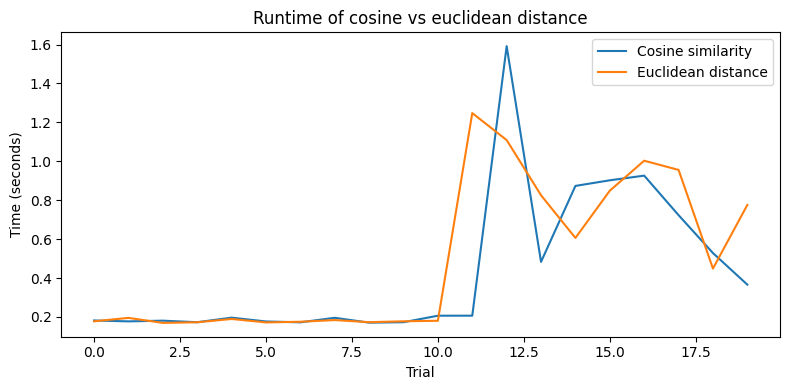

In [ ]:
cos_times, eu_times = benchmark_distance_methods(podcast_df, item_index=10)
plot_speed_results(cos_times, eu_times)

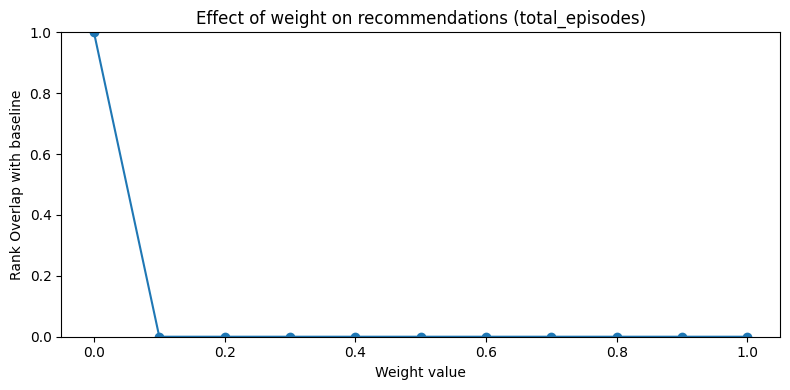

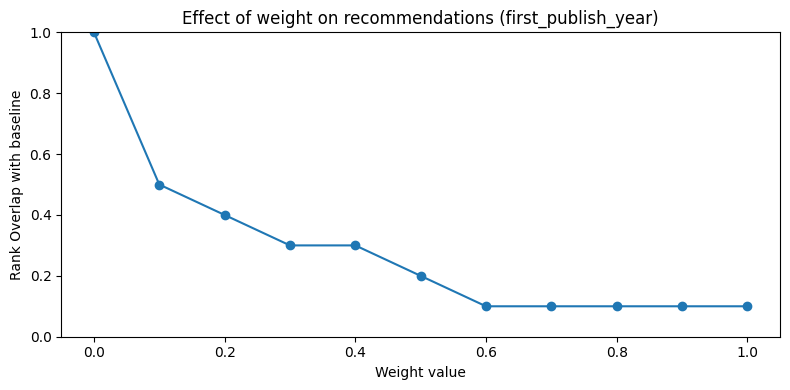

In [ ]:
weights, overlaps = test_weight_sensitivity(
    podcast_df,
    cosine_similarity,
    param="total_episodes",
    item_index=10
)

plot_weight_sensitivity(weights, overlaps, "total_episodes")

weights, overlaps = test_weight_sensitivity(
    book_df,
    euclidean_distance,
    param="first_publish_year",
    item_index=5
)

plot_weight_sensitivity(weights, overlaps, "first_publish_year")

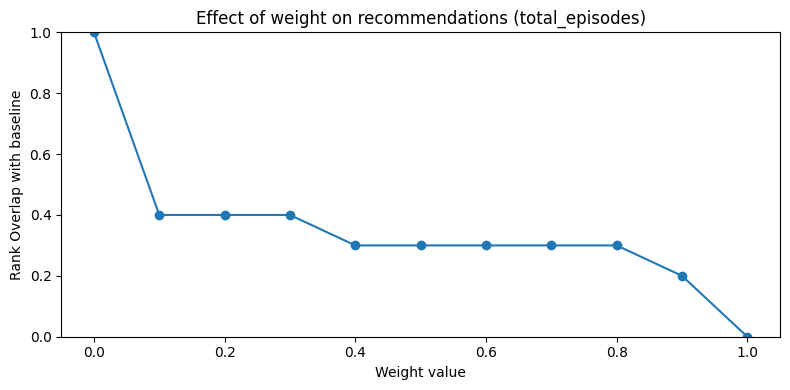

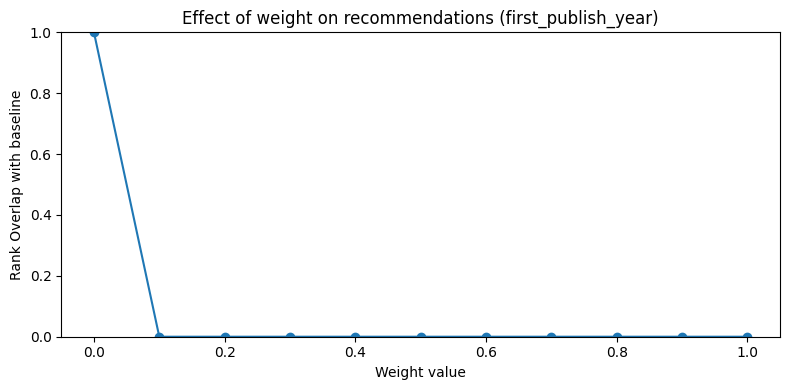

In [ ]:
weights, overlaps = test_weight_sensitivity(
    podcast_df,
    euclidean_distance,
    param="total_episodes",
    item_index=10
)

plot_weight_sensitivity(weights, overlaps, "total_episodes")

weights, overlaps = test_weight_sensitivity(
    book_df,
    cosine_similarity,
    param="first_publish_year",
    item_index=5
)

plot_weight_sensitivity(weights, overlaps, "first_publish_year")